<a href="https://colab.research.google.com/github/Vram97/Car-and-Truck-classification/blob/main/SIFT_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Akhilesh64/Image-Classification-using-SIFT.git

fatal: destination path 'Image-Classification-using-SIFT' already exists and is not an empty directory.


In [ ]:
from google.colab import drive

In [ ]:
!pip install opencv-python

In [ ]:
!pip install -U opencv-contrib-python==3.4.2.16

ERROR: Could not find a version that satisfies the requirement opencv-contrib-python==3.4.2.16 (from versions: 3.4.2.17, 3.4.3.18, 3.4.4.19, 3.4.5.20, 3.4.6.27, 3.4.7.28, 3.4.8.29, 3.4.9.31, 3.4.9.33, 3.4.10.35, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 3.4.16.59, 4.0.0.21, 4.0.1.24, 4.1.0.25, 4.1.1.26, 4.1.2.30, 4.2.0.32, 4.2.0.34, 4.3.0.36, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56, 4.5.4.58, 4.5.4.60)
ERROR: No matching distribution found for opencv-contrib-python==3.4.2.16


In [ ]:
!pip install opencv-contrib-python

In [ ]:
dataset = '/content/drive/MyDrive/CNNDataset.zip'

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/CNNDataset.zip'

Archive:  /content/drive/MyDrive/CNNDataset.zip
replace CNNDataset/train-annotations-bbox.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
#Importing the required libraries
import os
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
#Preparing the dataset 
path = '/content/CNNDataset'
image_path = []
folders=['Car','Truck']
for i in folders:
  dir = os.path.join(path, str(i))
  for file in os.listdir(dir):
    image_path.append(os.path.join(dir, file))


In [ ]:
def main(thresh):

  t0 = time.time()


  def CalcFeatures(img, th):
    sift = cv2.SIFT_create(th)

    kp, des = sift.detectAndCompute(img, None)
    print("SIFT is working")
    return des
  
  '''
  All the files appended to the image_path list are passed through the
  CalcFeatures functions which returns the descriptors which are 
  appended to the features list and then stacked vertically in the form
  of a numpy array.
  '''

  features = []
  for file in image_path:
    img = cv2.imread(file, 0)
    img_des = CalcFeatures(img, thresh)
    if img_des is not None:
      features.append(img_des)
  features = np.vstack(features)

  '''
  K-Means clustering is then performed on the feature array obtained 
  from the previous step. The centres obtained after clustering are 
  further used for bagging of features.
  '''

  k = 150
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
  flags = cv2.KMEANS_RANDOM_CENTERS
  compactness, labels, centres = cv2.kmeans(features, k, None, criteria, 10, flags)

  '''
  The bag_of_features function assigns the features which are similar
  to a specific cluster centre thus forming a Bag of Words approach.  
  '''

  def bag_of_features(features, centres, k = 500):
      vec = np.zeros((1, k))
      for i in range(features.shape[0]):
          feat = features[i]
          diff = np.tile(feat, (k, 1)) - centres
          dist = pow(((pow(diff, 2)).sum(axis = 1)), 0.5)
          idx_dist = dist.argsort()
          idx = idx_dist[0]
          vec[0][idx] += 1
      return vec

  labels = []
  vec = []
  for file in image_path:
    split_path=file.split("/")
    img = cv2.imread(file, 0)
    img_des = CalcFeatures(img, thresh)
    if img_des is not None:
      img_vec = bag_of_features(img_des, centres, k)
      vec.append(img_vec)
      labels.append(split_path[-2])
  vec = np.vstack(vec)

  '''
  Splitting the data formed into test and split data and training the 
  SVM Classifier.
  '''

  X_train, X_test, y_train, y_test = train_test_split(vec, labels, test_size=0.2)
  clf = SVC()
  clf.fit(X_train, y_train)
  preds = clf.predict(X_test)
  acc = accuracy_score(y_test, preds)
  conf_mat = confusion_matrix(y_test, preds)

  t1 = time.time()
  
  return acc*100, conf_mat, (t1-t0)

In [ ]:
!pip install opencv-python==3.3.0.10 opencv-contrib-python==3.3.0.10

ERROR: Could not find a version that satisfies the requirement opencv-python==3.3.0.10 (from versions: 3.4.0.14, 3.4.2.17, 3.4.3.18, 3.4.4.19, 3.4.5.20, 3.4.6.27, 3.4.7.28, 3.4.8.29, 3.4.9.31, 3.4.9.33, 3.4.10.35, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 3.4.16.57, 3.4.16.59, 4.0.0.21, 4.0.1.23, 4.0.1.24, 4.1.0.25, 4.1.1.26, 4.1.2.30, 4.2.0.32, 4.2.0.34, 4.3.0.36, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56, 4.5.4.58, 4.5.4.60)
ERROR: No matching distribution found for opencv-python==3.3.0.10


In [ ]:
accuracy = []
timer = []
threshold=[]
for i in range(5,46,5):
  
  print('\nCalculating for a threshold of {}'.format(i))
  data = main(i)
  accuracy.append(data[0])
  conf_mat = data[1]
  timer.append(data[2])
  print('\nAccuracy = {}\nTime taken = {} sec\nConfusion matrix :\n{}'.format(data[0],data[2],data[1]))
  threshold.append(i)



Streaming output truncated to the last 5000 lines.
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT is working
SIFT 

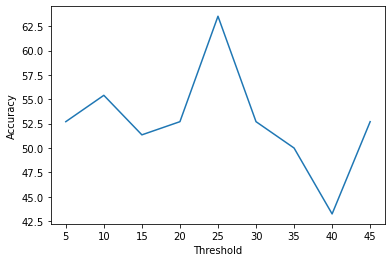

In [ ]:
import matplotlib.pyplot as plt
accuracy=np.array(accuracy)
threshold=np.array(threshold)
plt.plot(threshold,accuracy)
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.show()